In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
with open('../data/logins.json') as user_file:
  file_contents = user_file.read()
  
print(file_contents)

{"login_time": ["1970-01-01 20:13:18", "1970-01-01 20:16:10", "1970-01-01 20:16:37", "1970-01-01 20:16:36", "1970-01-01 20:26:21", "1970-01-01 20:21:41", "1970-01-01 20:12:16", "1970-01-01 20:35:47", "1970-01-01 20:35:38", "1970-01-01 20:47:52", "1970-01-01 20:26:05", "1970-01-01 20:31:03", "1970-01-01 20:34:46", "1970-01-01 20:36:34", "1970-01-01 20:39:25", "1970-01-01 20:40:37", "1970-01-01 20:34:58", "1970-01-01 20:43:59", "1970-01-01 20:47:46", "1970-01-01 20:46:34", "1970-01-01 20:56:07", "1970-01-01 20:49:12", "1970-01-01 20:59:06", "1970-01-01 20:59:59", "1970-01-01 21:15:01", "1970-01-01 21:09:24", "1970-01-01 21:19:24", "1970-01-01 21:20:53", "1970-01-01 21:29:19", "1970-01-01 21:58:05", "1970-01-01 21:51:51", "1970-01-01 21:59:40", "1970-01-01 22:08:34", "1970-01-01 22:02:51", "1970-01-01 21:58:32", "1970-01-01 22:02:31", "1970-01-01 22:05:32", "1970-01-01 22:02:46", "1970-01-01 22:10:28", "1970-01-01 22:11:58", "1970-01-01 22:01:05", "1970-01-01 22:19:10", "1970-01-01 22:16:

In [3]:
logins = json.loads(file_contents)

In [4]:
df = pd.DataFrame(logins)
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   login_time  93142 non-null  object
dtypes: object(1)
memory usage: 727.8+ KB


In [6]:
df.isna().sum()

login_time    0
dtype: int64

In [7]:
df['login_time'] = pd.to_datetime(df['login_time'])
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [9]:
df['count'] = 1
intervals_df = df.groupby(pd.Grouper(key='login_time', freq='15T')).sum()
intervals_df.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [10]:
intervals_df['time'] = intervals_df.index.to_series().dt.strftime('%H:%M')
intervals_df.head()

,count,time
login_time,,
1970-01-01 20:00:00,2,20:00
1970-01-01 20:15:00,6,20:15
1970-01-01 20:30:00,9,20:30
1970-01-01 20:45:00,7,20:45
1970-01-01 21:00:00,1,21:00


In [11]:
intervals_df['day'] = intervals_df.index.to_series().dt.dayofweek
intervals_df.head()

,count,time,day
login_time,,,
1970-01-01 20:00:00,2,20:00,3
1970-01-01 20:15:00,6,20:15,3
1970-01-01 20:30:00,9,20:30,3
1970-01-01 20:45:00,7,20:45,3
1970-01-01 21:00:00,1,21:00,3


In [12]:
intervals_df['weekend'] = intervals_df['day'] > 4
intervals_df.head()

,count,time,day,weekend
login_time,,,,
1970-01-01 20:00:00,2,20:00,3,False
1970-01-01 20:15:00,6,20:15,3,False
1970-01-01 20:30:00,9,20:30,3,False
1970-01-01 20:45:00,7,20:45,3,False
1970-01-01 21:00:00,1,21:00,3,False


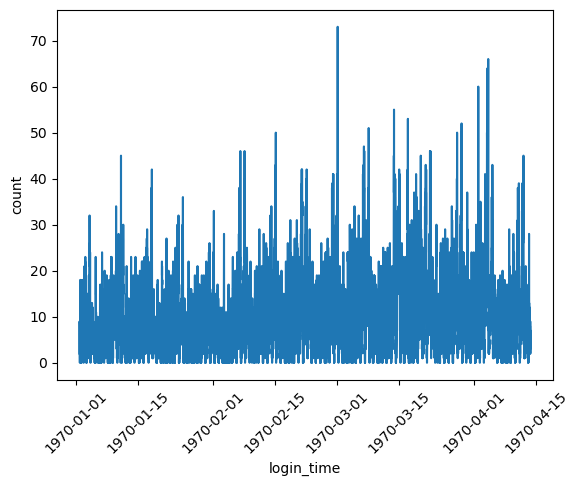

In [13]:
sns.lineplot(data=intervals_df, x=intervals_df.index, y='count')
plt.xticks(rotation=45);

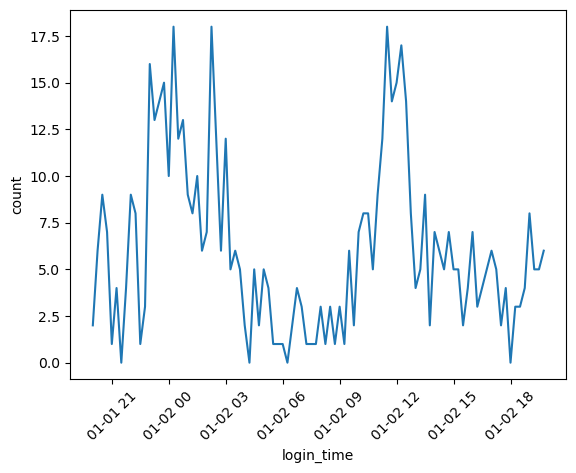

In [14]:
one_day_df = intervals_df.iloc[:96]
sns.lineplot(data=one_day_df, x=one_day_df.index, y='count')
plt.xticks(rotation=45);

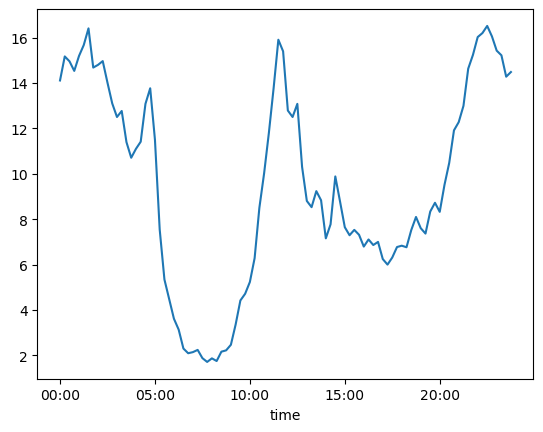

In [15]:
avg_df = intervals_df.groupby('time').mean()
avg_df['count'].plot();

In [16]:
df = intervals_df.groupby(['day','time']).mean()
df = df.reset_index()
df['time'] = pd.to_datetime(df['time'])
df['hour'] = df['time'].dt.strftime('%H')
df.head()

,day,time,count,weekend,hour
0,0,2023-08-21 00:00:00,8.400000,0.0,00
1,0,2023-08-21 00:15:00,9.333333,0.0,00
2,0,2023-08-21 00:30:00,9.600000,0.0,00
3,0,2023-08-21 00:45:00,8.066667,0.0,00
4,0,2023-08-21 01:00:00,7.266667,0.0,01


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   day      672 non-null    int64         
 1   time     672 non-null    datetime64[ns]
 2   count    672 non-null    float64       
 3   weekend  672 non-null    float64       
 4   hour     672 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 26.4+ KB


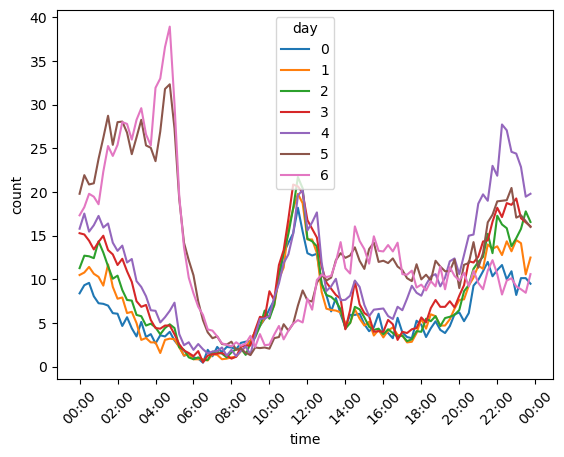

In [18]:
import matplotlib.dates as mdates
ax = sns.lineplot(data=df, x='time', y='count', hue='day', palette = "tab10")
ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.xticks(rotation=45);

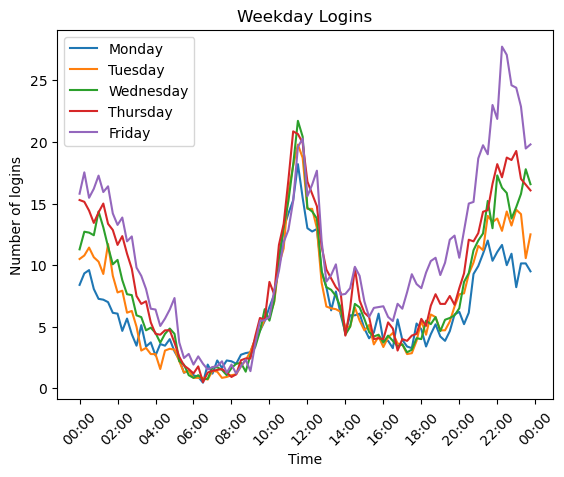

In [19]:
ax = sns.lineplot(data=df[df['weekend']==False], x='time', y='count', hue='day', palette = "tab10")
ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.legend(title=None, loc='upper left', labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.xticks(rotation=45)
ax.set(xlabel='Time', ylabel='Number of logins')
plt.title('Weekday Logins');

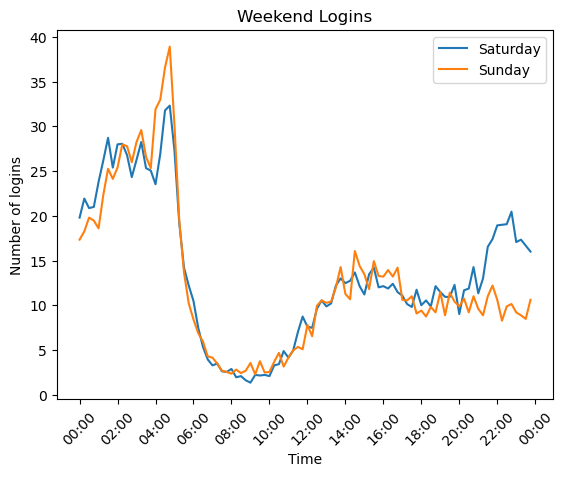

In [20]:
ax = sns.lineplot(data=df[df['weekend']==True], x='time', y='count', hue='day', palette = "tab10")
ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.legend(title=None, loc='upper right', labels=['Saturday', 'Sunday'])
plt.xticks(rotation=45)
ax.set(xlabel='Time', ylabel='Number of logins')
plt.title('Weekend Logins');

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   day      672 non-null    int64         
 1   time     672 non-null    datetime64[ns]
 2   count    672 non-null    float64       
 3   weekend  672 non-null    float64       
 4   hour     672 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 26.4+ KB
